# Mushroom Classification

Mosaab Muhammad <br>
August 10th, 2019

## I. Definition
### Project Overview
#### Project Origin:
This problem is taken from **Kaggle**, named as [Mushroom Classification](https://www.kaggle.com/uciml/mushroom-classification), and collected by **UCI Machine Learning**.
#### Problem Domain:
Before delving into the problem, let me introduce you to the problem domain, which is related to mushroom classification, to determine whether it's _poisonous_ or _edible_. 
<br>
Since the collected data shows the mushroom features, let me make them crisp and clear for you, to be able to understand the big picture. 
<br>
I'll start by an image, showing the most important features for mushroom: 
<br>
![Mushroom Features](images/mushroom_features_labeled.gif)


From the image, we can say that we have 5 main features of the mushroom:
1. **Cap:** which is the top part of the mushroom from above, which takes the umberlla shape.
2. **Gill:** which is the underside of the cap
3. **Ring:** which is this little shape that surround the stem (stalk).
4. **Stalk (Stem):** is what makes the mushroom standing, it's this vertical cylindrical.
5. **Veil (Volva):** which is the bottom shape of the mushroom, that covers the bottom part of the mushroom.
<br><br>

There are other features that is included in the dataset, such as:
- **Bruises**: Does the mushroom has bruises or not.
- **Spore Print Color**: Shows the color of the mushroom spores if viewed en masse. The image below shows how it looks like.[[1]](https://en.wikipedia.org/wiki/Spore_print) 
- **Oder**: Desribes the smell or the odor of the mushroom.
- **Population**: Shows what kind of populations that this mushroom grows.
- **Habitat**: Shows where it lives.
![Figure(2)](images/spore_print_color.jpg "Spore Print Color")

#### Attribute Information:
Now, let's look at the attributes of dataset, to know if we can understand now or not:
<br>
- **classes:** edible=e, poisonous=p

####  Features related to `Cap`:
- **cap-shape:** bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
- **cap-surface:** fibrous=f, grooves=g, scaly=y, smooth=s
- **cap-color:** brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

#### Features related to `Gill`:
- **gill-attachment:** attached=a, descending=d, free=f, notched=n
- **gill-spacing:** close=c, crowded=w, distant=d
- **gill-size:** broad=b, narrow=n
- **gill-color:** black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

#### Features related to `Stalk`:
- **stalk-shape:** enlarging=e,tapering=t

- **stalk-root:** bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- **stalk-surface-above-ring:** fibrous=f,scaly=y,silky=k,smooth=s

- **stalk-surface-below-ring:** fibrous=f,scaly=y,silky=k,smooth=s

- **stalk-color-above-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- **stalk-color-below-ring:** brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

#### Features related to `Veil`:
- **veil-type:** partial=p,universal=u

- **veil-color:** brown=n,orange=o,white=w,yellow=y

- **ring-number:** none=n,one=o,two=t

- **ring-type:** cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

#### `Misc` Features:
- **bruises:** bruises=t,no=f

- **odor:** almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- **spore-print-color:** black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- **population:** abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- **habitat:** grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

### Problem Statement
Our task here, is to be able to classify the mushroom whether it's _edible_ or _poisionous_ (Binary Classification), based on the given features.
<br>
Here's some inspirational questions, that I'm going to discover:
- What types of machine learning models perform best on this dataset?
- Which features are most indicative of a poisonous mushroom?
- Which features are most indicative of a edible mushroom?
<br>

**Point of View:** In my opinion, the last 2 questions are very important, because as a layman, he can take a look at the mushroom and determine whether it's edible or poisonous, I know, It's not that easy and it's very tricky to determine between them, but at least we can make a better decision based on data better than a decision based on nothing.

### Metrics
- Since we are concered about **Type II Error**, (false-negatives), meaning we don't want to say about the poisouous mushroom that it's safe, so I'm going to measure how well the predictions are based on the `Recall`.
- For this project, I'm going to use `Accuracy` to measure how well the prediction of the model is.
- For some reason, I'm going to use `ROC_AUC` Curve to measure how well the model is.

### Project Steps
- Import Libraries & Read Data:
- Explore the data:
    - I'll try a bar chart with each feature and how it relates to class/target feature.
- Preprocess the data:
    - Create dummy variables for each column.
    - Use PCA or t-SNE to reduce the number of dimensions.
    - ...
- Model the data:
    - Benchmark.
    - ...
- Evaluation:
    - ...
- Summary:
    - ...

## II. Analysis
### Import Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [49]:
%matplotlib inline
%precision 3
plt.style.use('ggplot')
sns.set_style('white')

### Read Data

In [5]:
df_origin = pd.read_csv('./mushrooms.csv')
df = df_origin.copy()

In [6]:
df.sample(6)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
4116,p,x,f,y,f,f,f,c,b,g,...,k,n,n,p,w,o,l,h,v,d
1419,e,f,s,w,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,a,g
995,e,f,s,w,f,n,f,w,b,n,...,f,w,w,p,w,o,e,k,a,g
3122,p,x,f,g,f,f,f,c,b,p,...,k,n,b,p,w,o,l,h,y,d
726,e,x,s,w,t,l,f,c,b,w,...,s,w,w,p,w,o,p,n,n,g
3835,p,x,f,g,f,f,f,c,b,h,...,k,b,p,p,w,o,l,h,y,d


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [7]:
# Let's see the shape of our dataframe
print("Shape of the data =", df.shape)

Shape of the data = (8124, 23)


#### Observation:
Since all the columns are `Categorical`, and we have 23 columns. We need to dummy those columns and use PCA or t-SNE to reduce those columns.

### Descriptive Statistics:

In [84]:
df_copy.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**Since in this dataset, the `veil-type` has only one value for each row, so I'm going to remove it.**

In [152]:
del df['veil-type']

Let's see if the class column is balanced or not

In [84]:
df['class'].value_counts().to_frame().style.background_gradient('summer')

# Looks like we have a balanced dataset.

,class
e,4208
p,3916


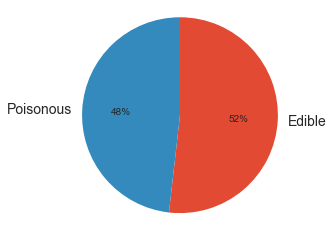

In [78]:
sorted_counts = df['class'].value_counts()
plt.pie(sorted_counts, labels=['Edible', 'Poisonous'], startangle=90, counterclock=False, autopct='%1.0f%%')
plt.axis('square');

## Exploratory Data Analysis (EDA)
In order to answer the first 2 questions, I'll take features one by one and see how it relates to the target class.
<br>

**Let's start with `Cap` Features:** [`cap-shape`, `cap-surface`, `cap-color`]

In [39]:
# First, I'll change the label for each column instead of a letter to a word, just for the sake of visualization,
# then I'll return it back, in the data preprocessing.
df_visual = df.copy()
    
cap_shape = dict(b='bell', c='conical', x='convex', f='flat', k='knobbed', s='sunken')
cap_surface = dict(f='fibrous', g='grooves', y='scaly', s='smooth')
cap_color = dict(n='brown', b='buff', c='cinnamon', g='gray', r='green', p='pink', u='purple', e='red', w='white', y='yellow')

df_visual['cap-shape'] = df_visual['cap-shape'].map(cap_shape)
df_visual['cap-surface'] = df_visual['cap-surface'].map(cap_surface)
df_visual['cap-color'] = df_visual['cap-color'].map(cap_color)

In [118]:
df_visual['class'] = df_visual['class'].map(dict(p='Poisonous', e='Edible'))

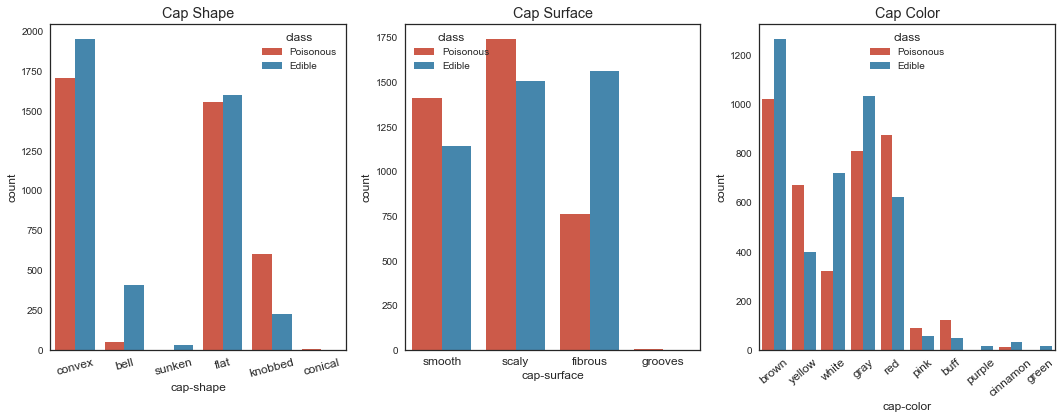

In [119]:
plt.figure(figsize=(18, 6))
plt.subplot(131)
sns.countplot(x='cap-shape', data=df_visual, hue='class')
plt.title('Cap Shape')
plt.xticks(rotation=15)

plt.subplot(132)
sns.countplot(x='cap-surface', data=df_visual, hue='class')
plt.title('Cap Surface')

plt.subplot(133)
sns.countplot(x='cap-color', data=df_visual, hue='class');
plt.title('Cap Color')
plt.xticks(rotation=40)
mlt.rc('xtick', labelsize=14) 

plt.subplots_adjust(wspace=.2)

#### Observation:
1. `Cap Shape`:
    - there are a lot of `Bell` shaped mushrooms that are edible.
    - All the `Sunken` shaped mushrooms _in our data_ are edible, since our data has a fewer samples of them.
    - If you see `knobbed` shaped mushroom, don't take it, since a lot of them are poisonous.
    - There is no records for `Conical` shaped mushrooms in our data.
2. `Cap Surface`:
    - The `Smooth` and `Scaly` surface are more poisonous than the edible ones.
    - There are a lot of `Fibrous` surface mushrooms that are safe.
    - There is no records for `Grooves` surface mushrooms in our data.
3. `Cap Color`:
    - A lot of mushrooms have `brown` and `gray` cap color, and more of them are safe.
    - The `Yellow` and `Red` cap colors are the most dangours among all colors in the dataset.
    - The `White` cap color is the safest mushroom among all the colors in the dataset.
    - The `Green` and `Purple` have fewer data, and all of them are safe.

**NOTE:**
- Since finding an edible mushroom is a tricky issue, in the above observations, I'm talking by percent, how much this shape or color is safe and so on.
- The observations here is not ready to be applied, the applied observations will be at the end of this notebook.

**Let's take the `Gill` Feature, and see how we can get anything from it:** [`gill-attachment`, `gill-spacing`, `gill-size`, `gill-color`]

In [86]:
# changing the label for each column instead of a letter to a word, just for the sake of visualization.

gill_attachment = dict(a='Attached', d='Descending', f='Free', n='Notched')
gill_spacing = dict(c='Close', w='Crowded', d='Distant')
gill_size = dict(b='Broad', n='Narrow')
gill_color = dict(n='Brown', b='Buff', g='Gray', r='Green', p='Pink', u='Purple', o='Orange',
                  h='Chocolate', k='Black', e='Red', w='White', y='Yellow')

df_visual['gill-attachment'] = df_visual['gill-attachment'].map(gill_attachment)
df_visual['gill-spacing'] = df_visual['gill-spacing'].map(gill_spacing)
df_visual['gill-size'] = df_visual['gill-size'].map(gill_size)
df_visual['gill-color'] = df_visual['gill-color'].map(gill_color)

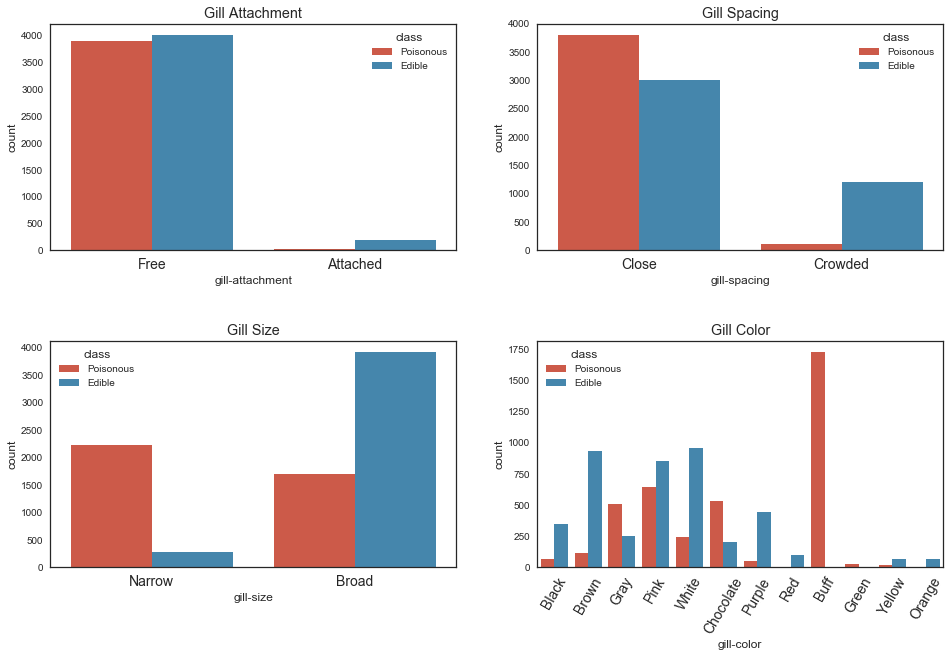

In [120]:
plt.figure(figsize=(16, 10))

plt.subplot(221)
sns.countplot(data=df_visual, x='gill-attachment', hue='class')
plt.title('Gill Attachment')

plt.subplot(222)
sns.countplot(data=df_visual, x='gill-spacing', hue='class')
plt.title('Gill Spacing')

plt.subplot(223)
sns.countplot(data=df_visual, x='gill-size', hue='class')
plt.title('Gill Size')

plt.subplot(224)
sns.countplot(data=df_visual, x='gill-color', hue='class')
plt.title('Gill Color')
plt.xticks(rotation=60)
mlt.rc('xtick', labelsize=12)


plt.subplots_adjust(wspace=.2, hspace=.4)

#### Observations:
- `Gill Attachment`:
    - If it's `Attached`, it's mostly safe, but it's hard to tell.
    - If it's `Free`, it doesn't add up much information.
- `Gill Spacing`:
    - If it's `Crowded`, then it's mostly edible.
    - It would be much safer, if you found mushroom with `Close Gill Spacing`, and didn't eat it.
- `Gill Size`:
    - If it's `Narrow`, then it's mostly poisonous.
    - If it's `Broad`, then it's mostly safe to eat, but take care.
- `Gill Color`:
    - The most poisonous color for gill mushroom is `Buff`, it's not safe at all.
    - The most safer color for gill is `Brown`, `White`, `Black`, and `Purple`.
    - It's hard to tell that `Orange`, `Red`, and `Yellow`, because we have a few data of them.

**Let's take the `Stalk` Feature, and see how it relates to edible or poisonous:** [`stalk-shape`, `stalk-root`, `stalk-surface-above-ring`, `stalk-surface-below-ring`, `stalk-color-above-ring`, `stalk-color-below-ring`]

In [129]:
# changing the label for each column instead of a letter to a word, just for the sake of visualization. 
stalk_shape              = dict(e='enlarging',t='tapering')
stalk_root               = {'b':'bulbous','c':'club','u':'cup','e':'equal','z':'rhizomorphs','r':'rooted', '?':'missing'}
stalk_surface_above_ring = dict(f='fibrous',y='scaly',k='silky',s='smooth')
stalk_surface_below_ring = dict(f='fibrous',y='scaly',k='silky',s='smooth')
stalk_color_above_ring   = dict(n='brown', b='buff', c='cinnamon', g='gray', o='orange', p='pink', e='red',
                                w='white', y='yellow')
stalk_color_below_ring   = dict(n='brown', b='buff', c='cinnamon', g='gray', o='orange', p='pink', e='red',
                                w='white', y='yellow')

# Map all the new labels to its corresponding column
df_visual['stalk-shape']              = df_visual['stalk-shape'].map(stalk_shape)
df_visual['stalk-root']               = df_visual['stalk-root'].map(stalk_root)
df_visual['stalk-surface-above-ring'] = df_visual['stalk-surface-above-ring'].map(stalk_surface_above_ring)
df_visual['stalk-surface-below-ring'] = df_visual['stalk-surface-below-ring'].map(stalk_surface_below_ring)
df_visual['stalk-color-above-ring']   = df_visual['stalk-color-above-ring'].map(stalk_color_above_ring)
df_visual['stalk-color-below-ring']   = df_visual['stalk-color-below-ring'].map(stalk_color_below_ring)

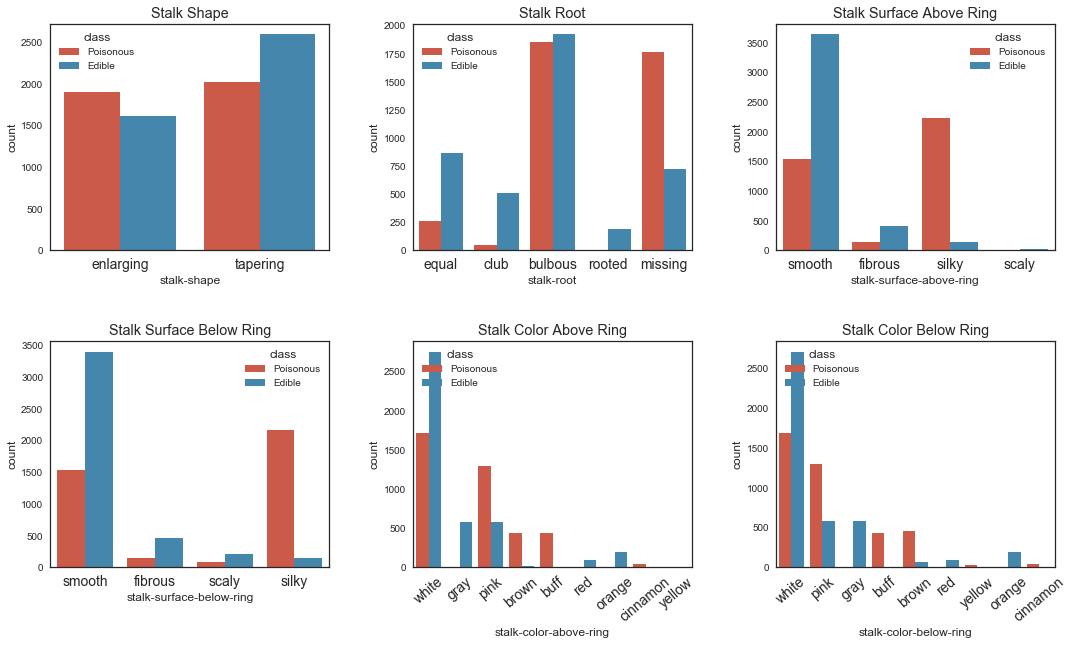

In [147]:
plt.figure(figsize=(18, 10))

plt.subplot(231)
sns.countplot(data=df_visual, x='stalk-shape', hue='class')
plt.title('Stalk Shape')

plt.subplot(232)
sns.countplot(data=df_visual, x='stalk-root', hue='class')
plt.title('Stalk Root')

plt.subplot(233)
sns.countplot(data=df_visual, x='stalk-surface-above-ring', hue='class')
plt.title('Stalk Surface Above Ring')


plt.subplot(234)
sns.countplot(data=df_visual, x='stalk-surface-below-ring', hue='class')
plt.title('Stalk Surface Below Ring')


plt.subplot(235)
sns.countplot(data=df_visual, x='stalk-color-above-ring', hue='class')
plt.title('Stalk Color Above Ring')
plt.xticks(rotation=40)

plt.subplot(236)
sns.countplot(data=df_visual, x='stalk-color-below-ring', hue='class')
plt.title('Stalk Color Below Ring')
plt.xticks(rotation=40)
mlt.rc('xtick', labelsize=14)

plt.subplots_adjust(wspace=.3, hspace=.4)

#### Observations:
- `Stalk Root`:
    - If the root is equal, club, or rooted, then it's mostly safe.
    
- `Stalk Surface`:
    - There are more safe mushrooms that has smooth stalk surface, than the poisnous ones.
    
- `Stalk Color`:
    - The more safer color for stalk is `White` and `Gray`.
    - The `Orange` is hard to tell, whether it's safe or not, since it has fewer records.
    - The most dangerous colors is `pink`, `buff`, and `brown`.

**Let's take the `Veil` and `Ring` Features, and see how it relates to edible or poisonous:** [`veil-type`, `veil-color`, `ring-number`, `ring-type`]

In [149]:
# changing the label for each column instead of a letter to a word, just for the sake of visualization.

veil_color  = dict(n='brown', o='orange', w='white', y='yellow')
ring_number = dict(n='none', o='one', t='two')
ring_type   = dict(c='cobwebby', e='evanescent', f='flaring', l='large', n='none', p='pendant',
                   s='sheathing', z='zone')

df_visual['veil-color']  = df_visual['veil-color'].map(veil_color)
df_visual['ring-number'] = df_visual['ring-number'].map(ring_number)
df_visual['ring-type']   = df_visual['ring-type'].map(ring_type)

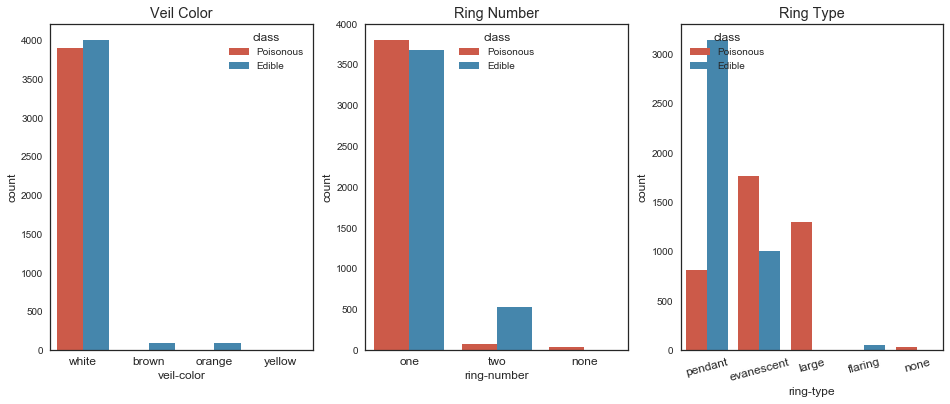

In [173]:
plt.figure(figsize=(16, 6))

plt.subplot(131)
sns.countplot(data=df_visual, x='veil-color', hue='class')
plt.title('Veil Color')

plt.subplot(132)
sns.countplot(data=df_visual, x='ring-number', hue='class')
plt.title('Ring Number')

plt.subplot(133)
sns.countplot(data=df_visual, x='ring-type', hue='class')
plt.title('Ring Type')
plt.xticks(rotation=15)
mlt.rc('xtick', labelsize=12)


plt.subplots_adjust(wspace=.2, hspace=.4)

#### Observations:
- `veil-color`:
    - This feature doesn't tell us much, since `Orange` and `Brown` are edible, but we have a fewer records to build a verdit based on it.
- `ring-number`:
    - It the mushroom has 2 rings, it's likely to be safe.
- `ring-type`:
    - If the mushroom has ring with type `Pendant` or `flaring`, then it's most likely to be edible.
    - If the mushroom has ring with type `evanescent` or `large`, then it's most likely to be poisonous.

**Time for the `Misc` Features: [`bruises`, `odor`, `spore-print-color`, `population`, `habitat`]**

In [174]:
bruises           = dict(t='true', f='false')
odor              = dict(a='almond', l='anise', c='creosote', y='fishy', f='foul', m='musty', n='none', 
                         p='pungent', s='spicy')
spore_print_color = dict(k='black', n='brown', b='buff', h='chocoloate', r='green', o='Orange', u='Purple',
                        w='White', y='Yellow')
population        = dict(a='Abundant', c='Clustered', n='Numerous', s='Scattered', v='Several', y='Solitary')
habitat           = dict(g='Grasses', l='Leaves', m='Meadows', p='Paths', u='Urban', w='Waste', d='Woods')


df_visual['bruises']             = df_visual['bruises'].map(bruises)
df_visual['odor']                = df_visual['odor'].map(odor)
df_visual['spore-print-color']   = df_visual['spore-print-color'].map(spore_print_color)
df_visual['population']          = df_visual['population'].map(population)
df_visual['habitat']             = df_visual['habitat'].map(habitat)

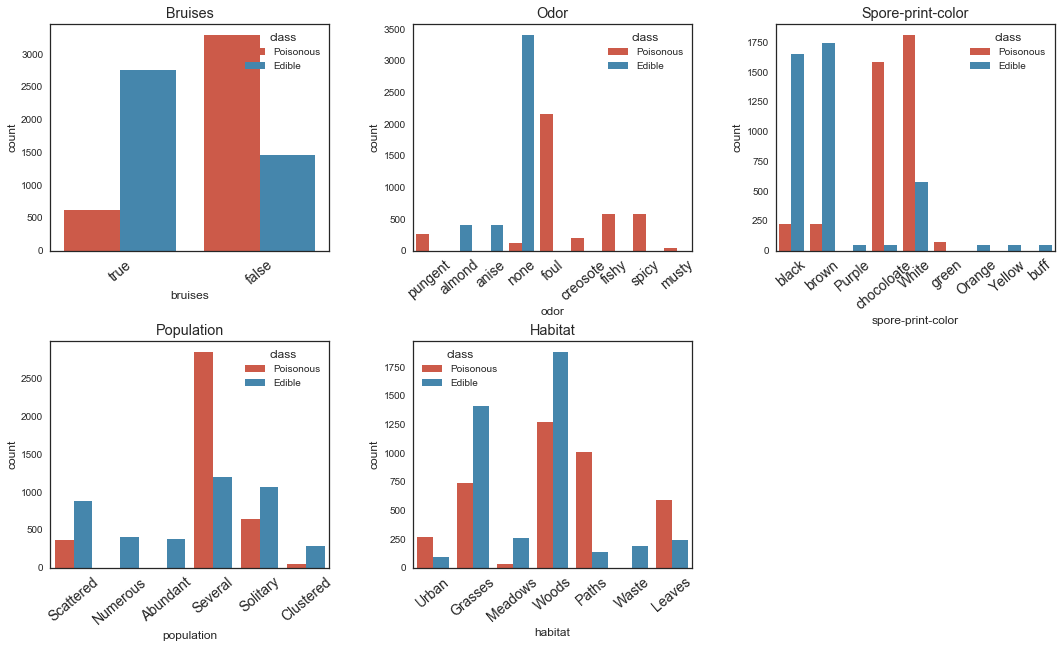

In [179]:
plt.figure(figsize=(18, 10))

labels = ['bruises', 'odor', 'spore-print-color', 'population', 'habitat']

for i, label in enumerate(labels):
    plt.subplot(2, 3, i+1)
    sns.countplot(data=df_visual, x=label, hue='class')
    plt.title(label.capitalize())
    plt.xticks(rotation=40)

mlt.rc('xtick', labelsize=14)
plt.subplots_adjust(wspace=.3, hspace=.4)

#### Observations:
- `Bruises`:
    - It the mushroom has bruises, it's most likey to be edible, and vice versa.
- `Odor`:
    - If the mushroom has no smell, or the smell of `Almond` or `Anise`, then it's edible.
    - If the mushroom has the smell of `Pungent`, `foul`, `creosote`, `fishy`, `spicy`, or `musty`, then it's poisonous.
- `Spore Print Color`:
    - If the color is `Black` or `Brown`, then it's most likely to be edible.
    - If the color is `Chocoloate` or `White`, then it's most likely to be poisonous.
    - For the colors `Purple`, `Orange`, `Yellow`, `Buff`, or `Green`, we don't have enough records to build a verdit.
- `Population`:
    - If it's `Numerous` or `Abundant`, then it's edible.
    - If it's `Scattered` or `Solitary`, then it's most likely to be edible.
    - If it's `Several`, then it's most likely to be poisonous.
- `Habitat`:
    - It's most likely to be edible, if the habitat of the mushroom is `Grasses`, `Woods`, or `Waste`.
    - It's most likely to be poisonous, if the habitat of the mushroom is `Paths`, `Leaves`, or `Urban`.

#### NOTE:
From the observations above, you noticed that most of them are wrote using `IF` condition, which means that we can build a model, which likely to be a decision tree to make a prediction based on those conditions for each feature.

## III. Methodology

### Data Preprocessing
Since we have 21 features and every feature in that 21 features is _categorical_, then I'm going to use dummy variable to convert these features into numerical features, and as a result, the number of columns will increase based how unique values in each feature.
<br>

Then to reduce those n features, I'm going to use PCA and t-SNE (which is the state-of-the-art in reducing dimensionality).
<br>

After reducing some dimensionalities, I'm going to fit those new features to the models, and see which one gives best results.